<div class="markdown-google-sans">
  <h1>Introduction to feed-forward neural networks</h2>
</div>





# scikit-learn


`scikit-learn` is a widely used open-source Python library for machine learning. It offers a broad range of algorithms for both supervised (e.g., classification, regression) and unsupervised (e.g., clustering, dimensionality reduction) learning tasks.

Beyond algorithms, it provides an integrated set of tools for the entire machine learning workflow, including:
- data preprocessing (scaling, encoding, splitting),
- model fitting and training,
- hyperparameter tuning,
- model selection & evaluation metrics,

alongside many other utilities that help build, test, and deploy machine learning models efficiently.

### Loading the data



In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import mean_squared_error, mean_absolute_error

GLOBAL_RANDOM_STATE = 21


In [ ]:
data, target = fetch_california_housing(return_X_y=True, as_frame=True) # returns a tuple: X (features / predictors) & y (target labels)

In [ ]:
data.head(3)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24

<Axes: title={'center': 'Geographical distribution of housing values'}, xlabel='Latitude', ylabel='Longitude'>

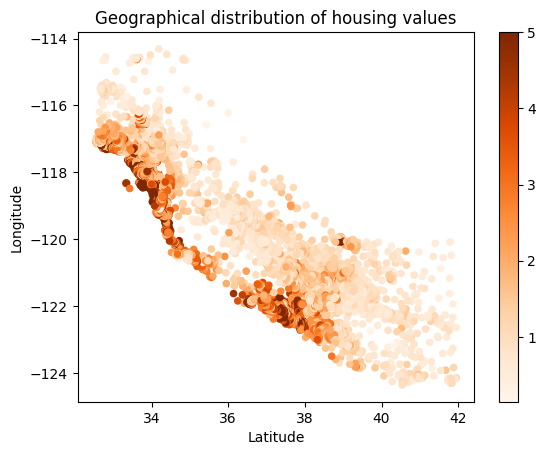

In [ ]:
data.plot.scatter(x='Latitude', y='Longitude', title='Geographical distribution of housing values', c=target, cmap='Oranges') # uses target variable to colour

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data,
                                                    target,
                                                    test_size=.2,
                                                    random_state=GLOBAL_RANDOM_STATE,
                                                    shuffle=True)

### Standardising the data

Standardising rescales features so they all have mean 0 and standard deviation 1 $→$ all on same footing regardless of their original units. This prevents features with large numeric ranges from dominating models that are sensitive to scale.

column-wise standardisation:

$x_{scaled}​ = \frac{x−\mu}{\sigma}$​

In [ ]:
ScalerX = StandardScaler() # from sklearn.preprocessing

X_train_stand = ScalerX.fit_transform(X_train) # fit (computes mean & std) -> then transform
X_test_stand = ScalerX.transform(X_test) # NB: only 'transform' -> question: why not fit?

print(X_train_stand.mean(axis=0))
print(X_train_stand.std(axis=0))


[-6.70759744e-17 -9.88120008e-17  1.65134917e-16  2.69164536e-16
  7.27239113e-17 -1.12689789e-17 -1.67281133e-15 -2.08274397e-15]
[1. 1. 1. 1. 1. 1. 1. 1.]


### Constructing the model


In [ ]:
from sklearn.neural_network import MLPRegressor # as opposed to a MLPClassifier -> class question: how would these be different?

# TL;DR: MLP = THE standard / vanilla NN / most basic building block of more complex model architectures.

# Multi-Layer Perceptron (MLP) is a type of neural network composed of layers of interconnected nodes (neurons),
# each neuron applies a weighted sum of its inputs followed by a nonlinear activation function.
# By stacking multiple layers -> MLPs can learn complex patterns and relationships in data.
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [ ]:
sklearn_model = MLPRegressor(hidden_layer_sizes=[2**10, 2**7, 2**5],
                             max_iter=5, # epochs
                             batch_size=200, # samples per gradient update (stochastic gradient descent w/ minibatches)
                             validation_fraction=.1,
                             early_stopping=True,  # this won't be realistically reached as we have set max_iter to 5
                             verbose=True) # -> shows progress & loss at each iteration

# NB in sklearn input size and output size are not specified; rather they are inferred from data when we fit: sklearn_model.fit(X_train, Y_train)

# what is input size?
print('X shape:', X_train.shape)
# output size?
print('y shape:', Y_train.shape, '\n', '-'*10)

X shape: (16512, 8)
y shape: (16512,) 
 ----------


In [ ]:
sklearn_model.fit(X_train, Y_train)

# NB: in regression validation score is R^2
# 1 = perfect explain; 0 = no better than predicting the mean; neg = worse than mean

Iteration 1, loss = 495.50957822
Validation score: -0.052741
Iteration 2, loss = 0.73720314
Validation score: 0.022078
Iteration 3, loss = 0.62909149
Validation score: 0.101226
Iteration 4, loss = 0.56958489
Validation score: 0.263874
Iteration 5, loss = 0.49957374
Validation score: 0.388047


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=200, early_stopping=True,
             hidden_layer_sizes=[1024, 128, 32], max_iter=5, verbose=True)

We now have a partially trained NN to predict house prices based on a set of inputs. Notice how other than standardising, we didn't have to do any feature engineering etc - this representational learning was done implicitly within the model.

In [ ]:
#@title TASK 1: implement the same model for the standardized data, experimenting with higher/lower batch sizes

sklearn_model_stand = MLPRegressor(hidden_layer_sizes=[2**10, 2**7, 2**5], max_iter=3, early_stopping=True, verbose=True)
sklearn_model_stand.fit(X_train_stand, Y_train)

Iteration 1, loss = 0.52915170
Validation score: 0.677831
Iteration 2, loss = 0.20331397
Validation score: 0.726441
Iteration 3, loss = 0.18466985
Validation score: 0.739486


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(early_stopping=True, hidden_layer_sizes=[1024, 128, 32],
             max_iter=3, verbose=True)

### Evaluating the models

We can use different metrics to evaluate the performance of the model:
- Mean Absolute Error
- Mean Squared Error
- $R^2$ or coefficient of determination
- others (use case dependent)


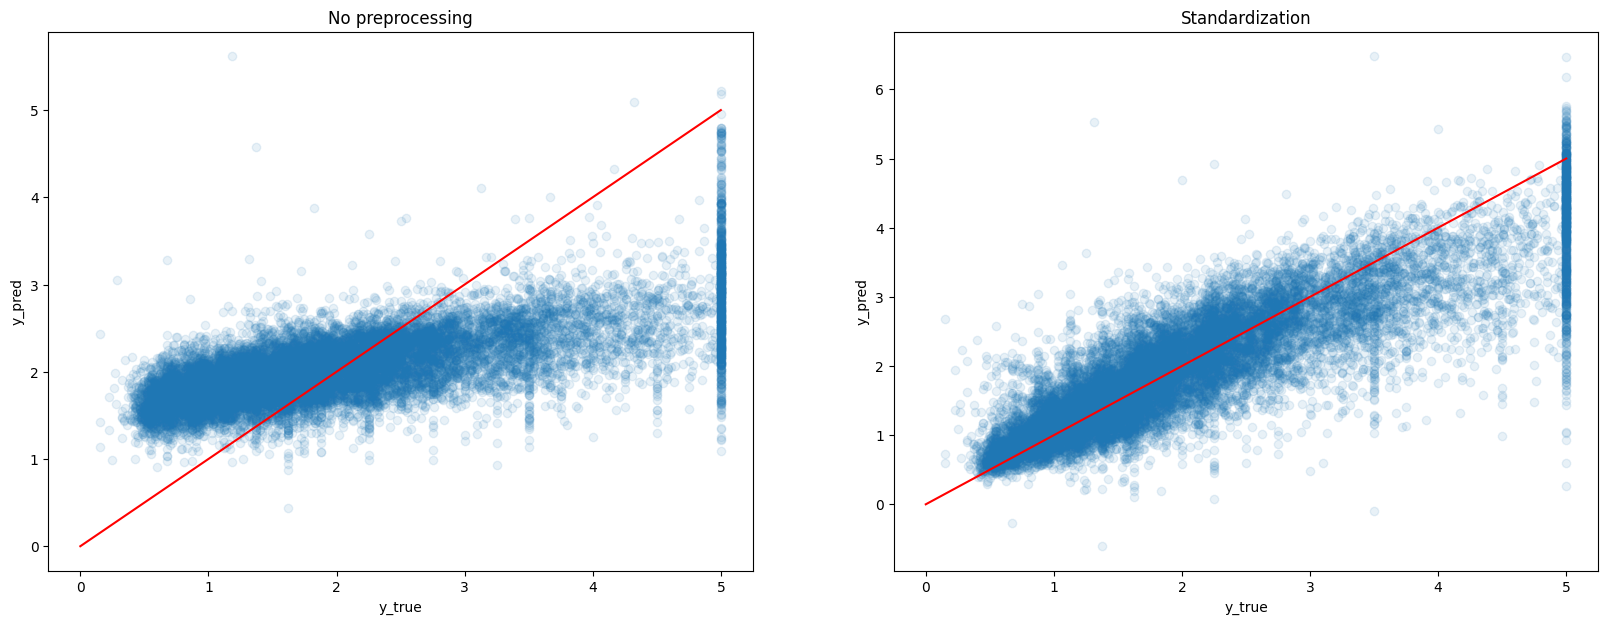

In [ ]:
# plotting ground truth vs predicted values

fig, axes = plt.subplots(1,2, # number of rows; cols
                         figsize=(20,7)) # width 20, height 7

model_input_title = [(sklearn_model, X_train, 'No preprocessing'), (sklearn_model_stand, X_train_stand, 'Standardization')]

for i in range(2):
  model, input, title = model_input_title[i]
  _ = axes[i].scatter(Y_train, model.predict(input), alpha=.1)
  _ = axes[i].plot(range(6),'r')
  _ = axes[i].set_xlabel('y_true')
  _ = axes[i].set_ylabel('y_pred')
  _ = axes[i].set_title(title)


The red line: This diagonal red line represents the ideal scenario where y_true is equal to y_pred. A perfect model would have all its points falling exactly on this line (i.e. the predicted house proces wouldbe exactly the same as the true house prices).

So we see that standardisation is an important preprocessing step even for NNs.

*NB: while a v deep and complex NN might eventually learn to compensate for unstandardised data, it would likely require significantly more training time and data to achieve the same performance as a network trained on standardised data.*




In [ ]:
#@title TASK 2: print MSE and MAE. What might be the downsides of using such metrics to evaluate the performance of the algorithm?

# save the predictions of each model
Y_pred, Y_pred_stand = sklearn_model.predict(X_test), sklearn_model_stand.predict(X_test_stand)

# MAE
mae, mae_stand = mean_absolute_error(Y_pred, Y_test), mean_absolute_error(Y_pred_stand, Y_test)

# MSE
mse, mse_stand = mean_squared_error(Y_pred, Y_test), mean_squared_error(Y_pred_stand, Y_test)

print(f"Mean absolute error of predictions: {mae:.5f} (without standardization), {mae_stand:.5f} (with standardization)")
print(f"Mean squared error of predictions: {mse:.5f} (without standardization), {mse_stand:.5f} (with standardization)")

Mean absolute error of predictions: 0.72221 (without standardization), 0.42287 (with standardization)
Mean squared error of predictions: 0.85212 (without standardization), 0.37023 (with standardization)


### MAE vs MSE

**MAE**
- avg of the absolute differences between the predicted and actual values.
$$MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|$$

- in the same units as the target variable,
- robust to outliers

**MSE**
- avg of squared differences between the predicted and actual values.
$$MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

- units harder to interpret directly,
- more sensitive to outliers (squares errors),
- has some nice mathematical properties.

---

### Use cases:

- *Use MAE when you want a robust metric that is less affected by outliers, or when you want the error to be in the same units as the target variable for easier interpretation.*

- *Use MSE when you want to heavily penalize large errors (outliers) or when you are working with models that are optimised using squared error (like most linear regression models).*

---

### Downsides to both:
1. **Sensitivity to scale** - is MAE/MSE of 100 good or bad? depends on the scale of the target var!
2. **Treats all errors equally** - is an underestimate / false positive the same as an over-estimate / false negative?
3. **Contain limitted info** - a single number summarising performance. Don't tell you where the errors are occurring (e.g., are they concentrated in a specific range of the target variable or for certain types of data instances?), or why the errors are happening.

# Deep Learning frameworks

`scikit-learn` is extremely user-friendly and recommended when getting warmed-up with ML. However, the implemented models are not flexible enough to suit tailored model implementation. In particular:

The most well-known DL frameworks are:
<ul>
<li><code>tensorflow</code> backed by Google</li>
<li><code>pytorch</code> backed by Meta</li>
<li><code>JAX</code> backed by Google</li>
</ul>


During the lab, we will mostly use `pytorch` - of course you are free to use any library of your choice for assignments and tutorials.

To get familiar with the basics of all three frameworks, we will implement a simple neural network for each of them. Our Feed-Forward NN (FNN) will contain 3 hidden layers (of size $2^{10}, 2^7, 2^5$) and a final layer with a sigmoid activation.

# PyTorch


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

### PyTorch input objects: Datasets & Dataloaders

First we need to convert our data into a PyTorch **Dataset** object.

This can then be loaded into a **Dataloader**, to easily iterate over the data in mini-batches during the training process.

In [ ]:
# torch only accepts torch.Tensors as input
X_train_torch, X_test_torch = torch.tensor(X_train.values), torch.tensor(X_test.values)
Y_train_torch, Y_test_torch = torch.tensor(Y_train.values), torch.tensor(Y_test.values)

# from Tensors to Dataset objects (PyTorch specific)
train_dataset = TensorDataset(X_train_torch, Y_train_torch)
test_dataset  = TensorDataset(X_test_torch, Y_test_torch)

# ---
# Below is a more granular / manual workflow for those who want more control:

"""
# torch only accepts torch.Tensors as input
X_train_torch, X_test_torch = torch.tensor(X_train), torch.tensor(X_test)
Y_train_torch, Y_test_torch = torch.tensor(Y_train), torch.tensor(Y_test)

class MyDataset(Dataset): # inherit from torch's Dataset class

  def __init__(self, X, Y):
    self.X = X
    self.Y = Y

  def __len__(self): # required by PyTorch's Dataset class: necessary for batching
    return len(self.X)

  def __getitem__(self, idx): # also required: allows retrieving single sample given an index
    return self.X[idx], self.Y[idx]


train_dataset = MyDataset(X_train_torch, Y_train_torch) # from a tensor object to a dataset object
test_dataset = MyDataset(X_test_torch, Y_test_torch)
"""

# Explanation of the above
# The `torch.utils.data.Dataset` class is an abstract base class provided / required by PyTorch. It defines a standard interface that other dataset classes must follow.

# To use our data with `PyTorch`'s data loading utilities (like `DataLoader`), we need an object that implements the methods required by the `Dataset` interface. The two essential methods are:

# 1. `__len__(self)`: This method must return the total number of samples in your dataset.
# 2. `__getitem__(self, idx)`: This method must return a single sample (input features and corresponding target label) when given an index idx.

# We will call this `MyDataset`.


"\n# torch only accepts torch.Tensors as input\nX_train_torch, X_test_torch = torch.tensor(X_train), torch.tensor(X_test)\nY_train_torch, Y_test_torch = torch.tensor(Y_train), torch.tensor(Y_test)\n\nclass MyDataset(Dataset): # inherit from torch's Dataset class\n\n  def __init__(self, X, Y):\n    self.X = X\n    self.Y = Y\n\n  def __len__(self): # required by PyTorch's Dataset class: necessary for batching\n    return len(self.X)\n\n  def __getitem__(self, idx): # also required: allows retrieving single sample given an index\n    return self.X[idx], self.Y[idx]\n\n\ntrain_dataset = MyDataset(X_train_torch, Y_train_torch) # from a tensor object to a dataset object\ntest_dataset = MyDataset(X_test_torch, Y_test_torch)\n"

With this set up, we're ready to define our NN architectures in PyTorch.

### Defining NN Architecture in Pytorch

Unlike sklearn, PyTorch is more involved;
1. we need to explicitly specify our layers, activations, and the transformation dimensions.
2. we need to explicitly lay out a workflow for training the network.

In [ ]:
# @title Define architecture

class TorchModel(nn.Sequential): # sequential = applies layers one after another (no need for custom forward method)

  def __init__(self, input_size):
      super().__init__()

      self.layer1 = nn.Linear(input_size, 2**10) # syntax: in_features, out_features
      self.relu1 = nn.ReLU()
      self.layer2 = nn.Linear(2**10, 2**7)
      self.relu2 = nn.ReLU()
      self.layer3 = nn.Linear(2**7, 2**5)
      self.relu3 = nn.ReLU()
      self.output_layer = nn.Linear(2**5, 1)

# https://pytorch.org/docs/stable/generated/torch.nn.Module.html


In [ ]:
# @title Define training process

def torch_train(model,
                dataset,
                optimizer,
                criterion=nn.MSELoss(), # our loss function
                batch_size=32,
                epochs=5,
                shuffle=True,
                verbose=False):

    # Wrap the dataset in a DataLoader (automates batching & shuffling)
    dataloader = DataLoader(dataset,
                            batch_size=batch_size,
                            shuffle=shuffle)

    # Set the model in "training mode"
    model.train()
    # (important for layers like dropout/batchnorm, which behave differently at train/test time)

    # loop over epochs (full passes)
    for epoch in range(epochs):
        # loop over mini-batches
        for i, (X, Y) in enumerate(dataloader):
            # Convert input tensors to float32
            X = X.float()
            Y = Y.float()
            # reset all prev accumulated gradients
            optimizer.zero_grad()
            # forward pass
            preds = model(X)
            # compute loss
            loss = criterion(preds, Y)
            # backward pass
            loss.backward()
            # update model params
            optimizer.step()
            if verbose:
                print(f"Epoch {epoch+1}/{epochs}, Iter {i+1}, Loss: {loss.item():.5f}")
    return model

In [ ]:
# instantiate

torch_arch = TorchModel(input_size=8)
print(torch_arch)

optimizer = optim.Adam(torch_arch.parameters(), lr=10**-2)
print(optimizer)

TorchModel(
  (layer1): Linear(in_features=8, out_features=1024, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=1024, out_features=128, bias=True)
  (relu2): ReLU()
  (layer3): Linear(in_features=128, out_features=32, bias=True)
  (relu3): ReLU()
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
)
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


In [ ]:
# @title Train the model
model = torch_train(torch_arch, train_dataset, optimizer, epochs=1,verbose=True)

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
# @title Make predictions

model.eval()

with torch.no_grad():  # no gradient tracking needed for inference
    y_pred = model(X_test_torch.float())

y_pred # y_pred will be a tensor of shape (n_test, 1) (regression)

y_pred_np = y_pred.numpy().flatten()
y_pred_np



array([2.1483724, 2.113012 , 2.1070144, ..., 2.526202 , 2.3851974,
       2.6271007], dtype=float32)

#Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.nn import relu, tanh

tf.random.set_seed(GLOBAL_RANDOM_STATE)

In [ ]:
# @title Data to np arrays

# like with PyTorch, Tensorflow does not accept pd.DataFrames
# unlike PyTorch, Tensorflow wants np arrays
X_train_np, Y_train_np, X_test_np, Y_test_np =  X_train.values, Y_train.values, X_test.values, Y_test.values

In [ ]:
# @title Define model architecture

# in Tensorflow we just define the layer dims & the activation
# diff from PyTorch:
    # - the activation is within the layer
    # - we dont define input & output (layer dims = output dims)

# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

TFModel = Sequential([Dense(2**10, input_shape=(X_train.shape[1],), activation=tanh),
                       Dense(2**7, activation=tanh),
                       Dense(2**5, activation=tanh),
                       Dense(1)]) # output layer - default is identity fn (linear activation function)

loss = 'mean_squared_error'

TFModel.compile(loss=loss)

TFModel.fit(X_train_np, Y_train_np, batch_size=32, epochs=5, shuffle=False, verbose=True)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 1.5863
Epoch 2/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.3405
Epoch 3/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.3408
Epoch 4/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.3402
Epoch 5/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 1.2943


In [ ]:
# @title Task 2: change activation function of the last layer to tanh and retrain the model
TFModel.layers[-1].activation = tanh

for i, layer in enumerate(TFModel.layers):
    try:
        print(f"Activation function for layer {i}: {layer.activation}")
    except AttributeError:
        print(f"Layer {i} uses no activation function")


TFModel.fit(X_train_np, Y_train_np, batch_size=200, epochs=5)

Activation function for layer 0: <function tanh at 0x7f4743f0be20>
Activation function for layer 1: <function tanh at 0x7f4743f0be20>
Activation function for layer 2: <function tanh at 0x7f4743f0be20>
Activation function for layer 3: <function tanh at 0x7f4743f0be20>
Epoch 1/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2.4318
Epoch 2/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.4205
Epoch 3/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4201
Epoch 4/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4200
Epoch 5/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4200


# JAX

JAX = NumPy on accelerators (CPU/GPU/TPU) + automatic differentiation.
- Functional programming
- Closer to raw maths / NumPy
    - Very natural for researchers prototyping new algorithms.
    - You write plain NumPy-like code, then decorate with grad, jit, etc.
- *Can* be more efficiently implemented than PyTorch or TensorFlow

In [ ]:
import jax
import jax.numpy as jnp
from jax import value_and_grad

In [ ]:
def jax_dense_layer(x, weights, relu=False):
  '''Define a dense layer'''
  W,b = weights
  out = jnp.dot(x, W.T) + b
  if relu:
    out = jnp.maximum(jnp.zeros_like(a=out),out)
  return out

def jax_init_weights(shapes, input_shape, output_shape, seed):
  weights = []
  seed = jax.random.PRNGKey(seed if seed is not None else 42)
  for i, shape in enumerate(shapes):
      if i==0:
          w = jax.random.uniform(key=seed, shape=(shape, input_shape), minval=-1.0, maxval=1.0, dtype=jnp.float32)
      else:
          w = jax.random.uniform(key=seed, shape=(shape, shapes[i-1]), minval=-1.0, maxval=1.0, dtype=jnp.float32)
      b = jax.random.uniform(key=seed, minval=-1.0, maxval=1.0, shape=(shape,), dtype=jnp.float32)
      #append weights
      weights.append([w,b])

  w_out = jax.random.uniform(key=seed, shape=(output_shape, shape), minval=-1.0, maxval=1.0, dtype=jnp.float32)
  b_out = jax.random.uniform(key=seed, minval=-1.0, maxval=1.0, shape=(output_shape,), dtype=jnp.float32)
  weights.append([w_out,b_out])
  #print(",".join([f"w{i}:{w.shape} b{i}:{b.shape}" for i, (w,b) in enumerate(weights)]))
  return weights


def jax_forward(x, weights):
  '''simple forward pass'''
  depth = len(weights)
  for i in range(depth):
    if i <= depth -1:
      x = jax_dense_layer(x, weights=weights[i], relu=True)
    else:
      x = jax_dense_layer(x, weights=weights[depth], relu=False)

  return x


def jax_mse_loss(x, y, weights):
  '''MSE loss function'''
  pred = jax_forward(x, weights)
  loss = jnp.mean((pred - y) ** 2)
  return loss


def grad_update(x, y, weights):
  '''return value and gradient update of the loss function wrt the weights'''
  return value_and_grad(jax_mse_loss)(x, y, weights)


def weights_update(weights, grads, lr=0.01):
    '''update weights for layers of NN'''
    depth = len(weights)
    for j in range(len(weights)):
        weights[j][0] -= lr * grads[j][0] ## updates w
        weights[j][1] -= lr * grads[j][1] ## updates b

    return weights

def train_step(x, y, weights, lr=0.01):
    '''single epoch training step'''
    loss, grads = grad_update(x, y, weights)
    weights = weights_update(weights, grads, lr=lr) ## updates w,b
    return loss, weights


def jax_train(layers_shape, torch_dataset, batch_size=32, epochs=5, shuffle=False, verbose=False, seed=None):
  '''initializes the FNN model, loops over data and updates weights'''

  dataloader = DataLoader(torch_dataset, batch_size=batch_size, shuffle=shuffle)

  #for epoch in tqdm(range(EPOCHS)):
  for epoch in range(epochs):
    for i, (X, Y) in enumerate(dataloader):
      X = jnp.array(X.numpy())
      Y = jnp.array(Y.numpy())[:, None]

      if epoch == 0 and i == 0:
        input_shape = X.shape[-1]
        output_shape = Y.shape[-1]
        weights = jax_init_weights(layers_shape, input_shape, output_shape, seed=seed)

      loss, weights = train_step(X,Y, weights)
      if verbose:
        print("MSE : {:.2f} at epoch {}, iter {}".format(jnp.array(loss).mean(),epoch, i))

  return weights

jax_train([2**10, 2**7, 2**5], train_dataset, epochs=1, verbose=True)